In [12]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch import optim
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation
import math, random
torch.__version__

'1.3.1'

## 3.3 通过Sin预测Cos
在介绍循环神经网络时候我们说过，循环神经网络由于其的特殊结构，十分十分擅长处理时间相关的数据，下面我们就来通过输入sin函数，输出cos函数来实际使用。 首先，我们还是定义一些超参数

In [13]:
TIME_STEP = 10 # rnn 时序步长数
INPUT_SIZE = 1 # rnn 的输入维度
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
H_SIZE = 64 # of rnn 隐藏单元个数
EPOCHS=300 # 总共训练次数
h_state = None # 隐藏层状态

由于是使用sin和cos函数，所以这里不需要dataloader，我们直接使用Numpy生成数据，Pytorch没有π这个常量，所以所有操作都是用Numpy完成

In [14]:
steps = np.linspace(0, np.pi*2, 256, dtype=np.float32)
x_np = np.sin(steps) 
y_np = np.cos(steps)

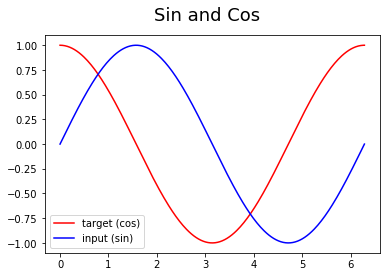

In [15]:
# 生成完后，我们可视化一下数据
plt.figure(1)
plt.suptitle('Sin and Cos',fontsize='18')
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [16]:
## 定义一下网络结构
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=H_SIZE,
            num_layers=1,
            batch_first=True,
        )
        self.out=nn.Linear(H_SIZE, 1)
    
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step, :]))
        return torch.stack(outs, dim=1), h_state
        

In [17]:
rnn = RNN().to(DEVICE)
optimizer = torch.optim.Adam(rnn.parameters())
criterion = nn.MSELoss()

EPOCHS: 19, Loss:0.158654


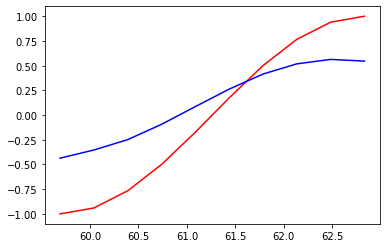

EPOCHS: 39, Loss:0.027260


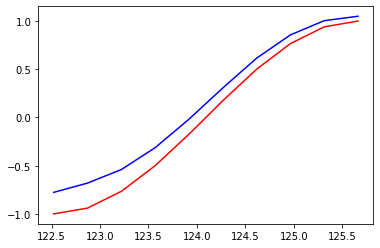

EPOCHS: 59, Loss:0.003296


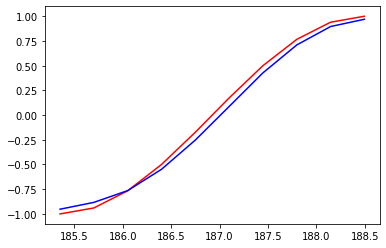

EPOCHS: 79, Loss:0.019046


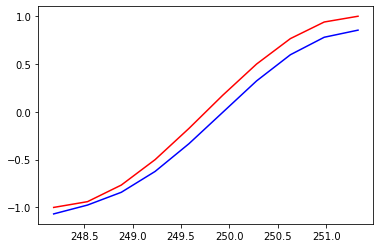

EPOCHS: 99, Loss:0.013730


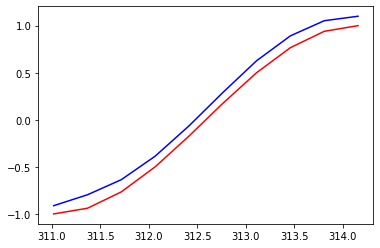

EPOCHS: 119, Loss:0.013795


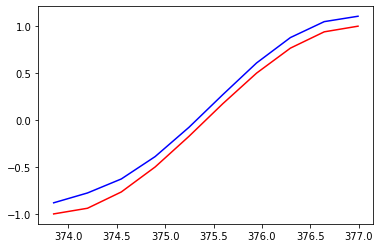

EPOCHS: 139, Loss:0.002379


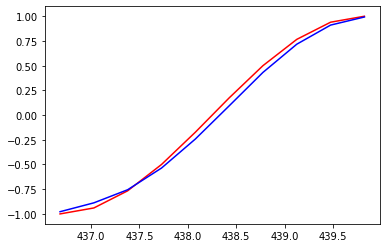

EPOCHS: 159, Loss:0.000700


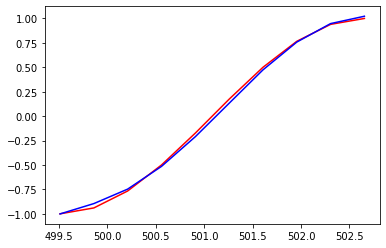

EPOCHS: 179, Loss:0.002686


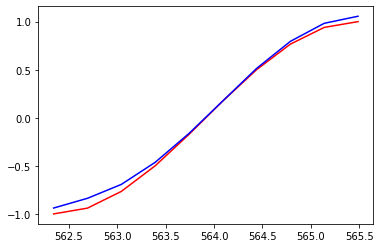

EPOCHS: 199, Loss:0.001059


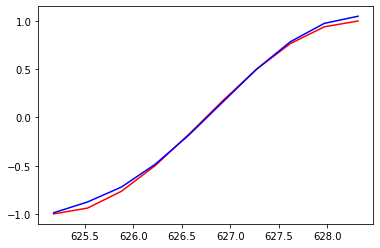

EPOCHS: 219, Loss:0.007861


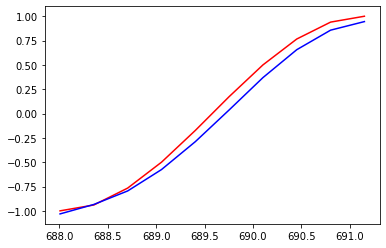

EPOCHS: 239, Loss:0.003730


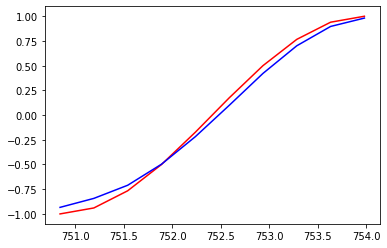

EPOCHS: 259, Loss:0.021092


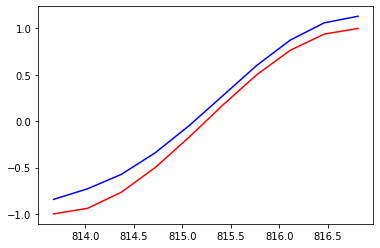

EPOCHS: 279, Loss:0.005312


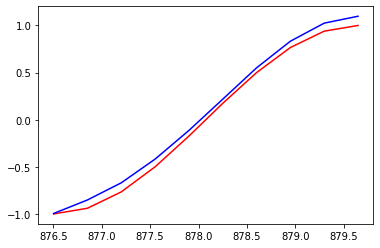

EPOCHS: 299, Loss:0.001337


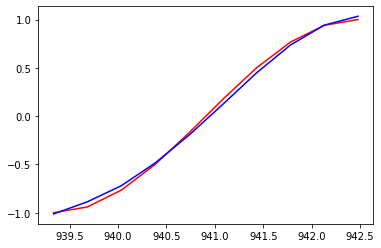

In [18]:
rnn.train()
plt.figure(2)
for step in range(EPOCHS):
    start, end = step * np.pi, (step + 1) * np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    x = x.to(DEVICE)
    prediction, h_state = rnn(x, h_state)
    h_state = h_state.data
    loss = criterion(prediction.cpu(), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if((step + 1)%20 == 0):
        print('EPOCHS: {}, Loss:{:4f}'.format(step, loss))
        plt.plot(steps, y_np.flatten(), 'r-')
        plt.plot(steps, prediction.cpu().data.numpy().flatten(), 'b-')
        plt.draw()
        plt.pause(0.01)